<div style = "text-align: center">
    <img  src = "https://th.bing.com/th/id/R.7a7b7035866b2fc3e8b6e3adecebc1ec?rik=lrA2Bvqew%2fhJ4g&pid=ImgRaw&r=0", alt= "Google Images"/>
     <h1>Google Play Store Apps</h1>
    <h2> Goal </h2>
    <p> Analysis of the Playstore android market, for developers to tap into the market and in making apps that are more consumer centric </p>
 </div>
 <div>
    <h2> Procedure </h2>
    <u> 
        <li></li>
        <li></li>
        <li></li>
        <li></li>
        <li></li>
    </u>
    
 </div>

In [46]:
# import the necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dash 
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None) # ensure all columns are visible
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_error, r2_score



In [5]:
# import dataset
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Exploration 

Getting a general look of the current data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
# rename the columns by replacing the space with underscores
new_cols = [x.replace(' ', '_') for x in df.columns]
new_cols

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content_Rating',
 'Genres',
 'Last_Updated',
 'Current_Ver',
 'Android_Ver']

In [13]:
df.columns = new_cols
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [21]:
# check for null values in the dataset
print(df.shape)
df.apply(lambda x: sum(x.isnull()))

(10841, 13)


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

Missing vlaues are handles using different interpolation techniques which estimate the missing vlaues from the other training examples.
The values can be replaced using the following procedures:
* Mean value
* Median value
* Mode or the most frequent value
* Constant Value

#####  Goal
One way to to decide the effective technique of the above imputation method is to find out whhich is the better measure of central tendency of data and use that  value to  for replacing missing values appropriately.
* Box plots and Distribution plots are some of the techniques that can be used

The Rating column has a total of 1474 missing values. Resolve the missing values by either dropping the missing values or replacing the missing values using the mode or mean

In [34]:
fig = px.box(df['Rating'], title='Rating Box Plot')
fig.show()

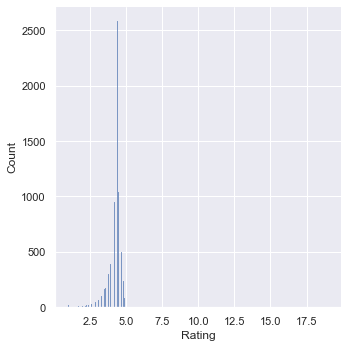

In [47]:
sns.set(rc={"figure.figsize":(8, 4)})
ax = sns.displot(df['Rating'])
plt.show()

The data seems to be right skewed. In cases where the data maybe skewed as shown above, use mode. (For both categorical and numerical data)

In [38]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mode()[0])

In [39]:
df.apply(lambda x: sum(x.isnull()))

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    1
Genres            0
Last_Updated      0
Current_Ver       8
Android_Ver       3
dtype: int64

<AxesSubplot:>

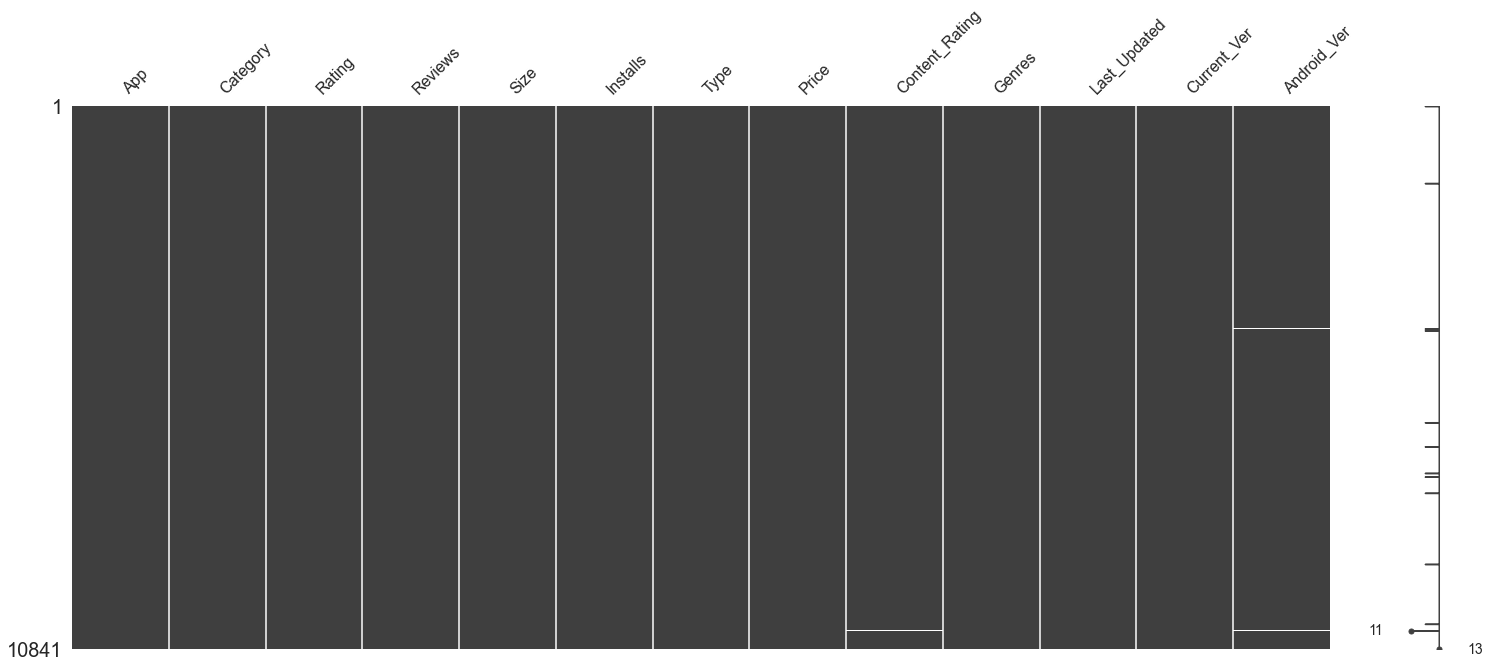

In [48]:
msno.matrix(df)

In [ ]:
fig 